In [1]:
import sklearn.preprocessing as prepro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture, metrics, cluster
from sklearn.decomposition import PCA
import seaborn as sb

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectation', 'total_fertility', 'GDP'],
      dtype='object')

##################################

country              object
child_mortality     float64
exports             float64
health              float64
imports             float64
income                int64
inflation           float64
life_expectation    float64
total_fertility     float64
GDP                 float64
dtype: object


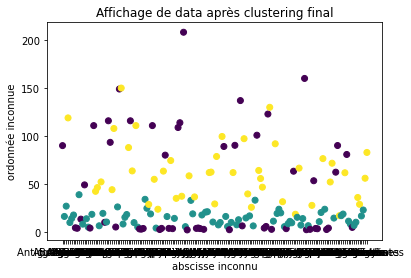

In [50]:
data = pd.read_csv("../src/data.csv")

colnames = data.columns
print(data.columns)
print("\n##################################\n")
print(data.dtypes)

plt.scatter(data.iloc[:,0], data.iloc[:,1],c=labels)
plt.title("Affichage de data après clustering final")
plt.xlabel("abscisse inconnu")
plt.ylabel("ordonnée inconnue")
plt.show()

In [3]:
print(pd.isna(data).sum())

country             0
child_mortality     0
exports             0
health              0
imports             0
income              0
inflation           0
life_expectation    0
total_fertility     2
GDP                 2
dtype: int64


In [4]:
print(data.head())

               country  child_mortality  exports  health  imports  income  \
0          Afghanistan             90.2     10.0    7.58     44.9    1610   
1              Albania             16.6     28.0    6.55     48.6    9930   
2              Algeria             27.3     38.4    4.17     31.4   12900   
3               Angola            119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   

   inflation  life_expectation  total_fertility      GDP  
0       9.44              56.2             5.82    553.0  
1       4.49              76.3             1.65   4090.0  
2      16.10              76.5             2.89   4460.0  
3      22.40              60.1             6.16   3530.0  
4       1.44              76.8             2.13  12200.0  


In [5]:
data_1 = data.fillna(data.mean())
print(pd.isna(data_1).sum())

country             0
child_mortality     0
exports             0
health              0
imports             0
income              0
inflation           0
life_expectation    0
total_fertility     0
GDP                 0
dtype: int64


In [6]:
print(data_1.describe())

       child_mortality     exports      health     imports         income  \
count       167.000000  167.000000  167.000000  167.000000     167.000000   
mean         38.270060   41.108976    6.815689   46.890215   17144.688623   
std          40.328931   27.412010    2.746837   24.209589   19278.067698   
min           2.600000    0.109000    1.810000    0.065900     609.000000   
25%           8.250000   23.800000    4.920000   30.200000    3355.000000   
50%          19.300000   35.000000    6.320000   43.300000    9960.000000   
75%          62.100000   51.350000    8.600000   58.750000   22800.000000   
max         208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expectation  total_fertility             GDP  
count  167.000000        167.000000        167.00000      167.000000  
mean     7.781832         70.134132          2.92600    29710.387879  
std     10.570704         10.435428          1.47034   132688.767896  
min     -4.210000     

In [7]:
data_2 = data_1.drop(['country'], axis = 1)

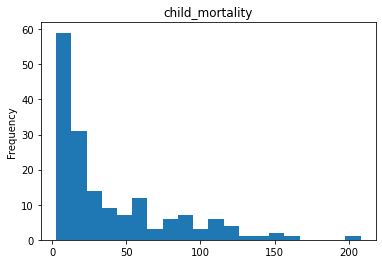

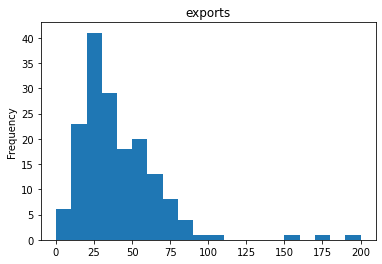

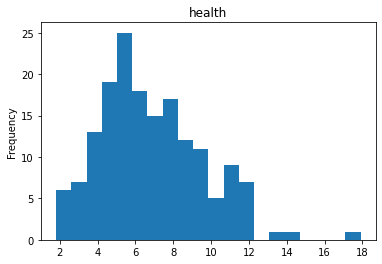

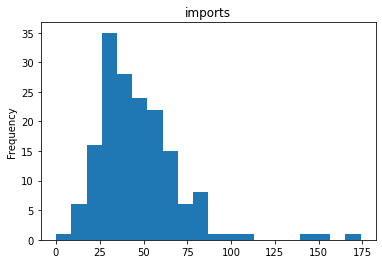

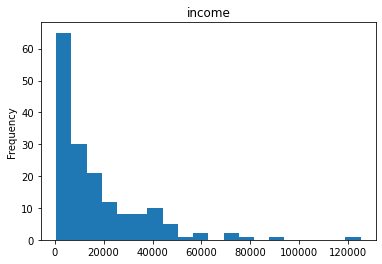

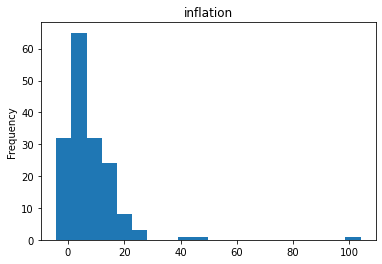

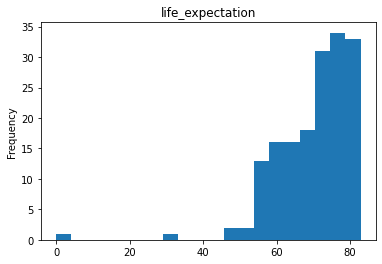

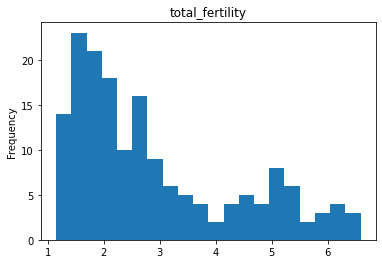

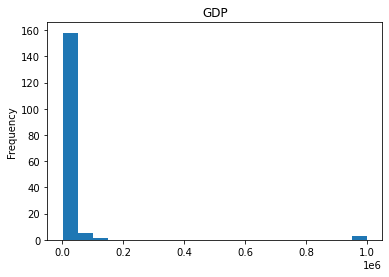

In [8]:
for column in data_2.columns:
    data_2[column].iloc[:].plot.hist(bins = 20, subplots = True)
    plt.title(column)
    plt.show()

In [9]:
quantile_min = 0.15
quantile_max = 0.85

data_3 = pd.DataFrame()

for column in data_2.columns:

    mean = data_2[column].mean()
    q_min = data_2[column].quantile(quantile_min)
    q_max = data_2[column].quantile(quantile_max)

    for j in range(len(data_2[column].iloc[:])):
        if data_2[column].iloc[j] < q_min or data_2[column].iloc[j] > q_max :
            data_2[column][j] = mean
    
    data_3[column] = data_2[column]

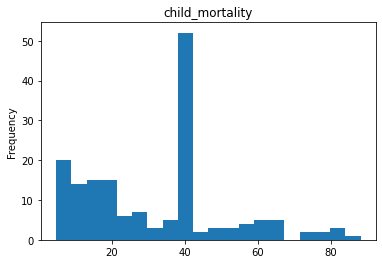

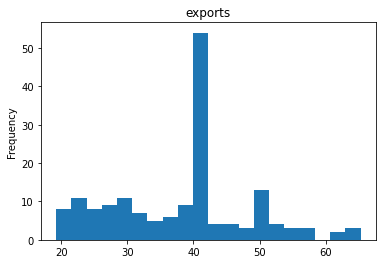

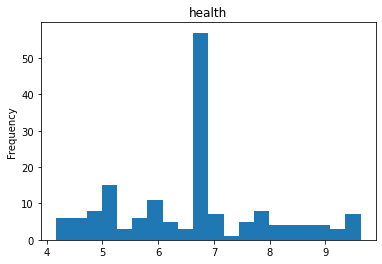

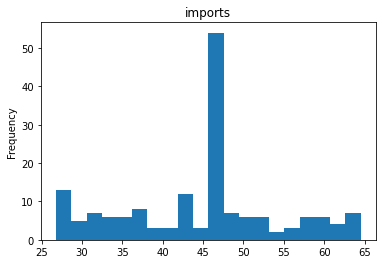

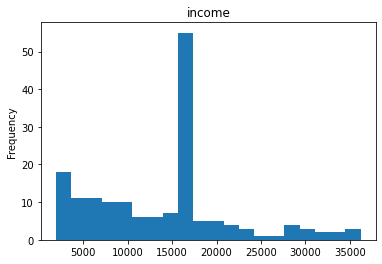

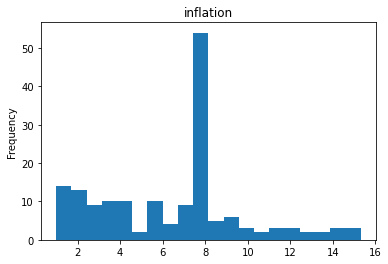

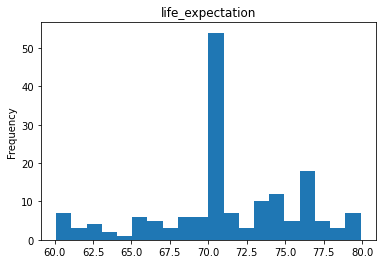

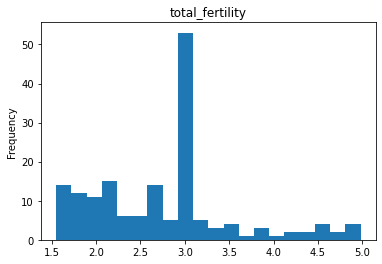

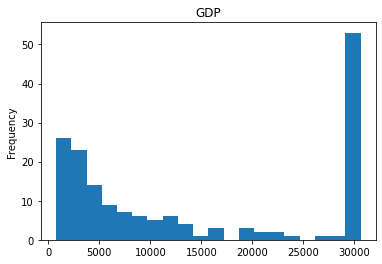

In [10]:
for column in data_3.columns:
    data_3[column].iloc[:].plot.hist(bins = 20, subplots = True)
    plt.title(column)
    plt.show()

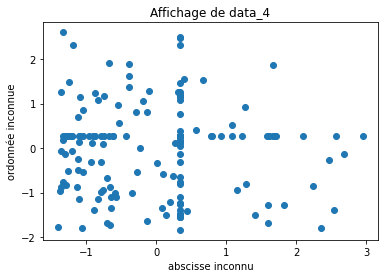

                  0             1             2             3             4  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean   4.786590e-17 -3.377205e-16  8.848544e-16 -3.510166e-16  6.382120e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -1.403908e+00 -1.841701e+00 -1.890206e+00 -1.863193e+00 -1.531230e+00   
25%   -8.533663e-01 -8.384336e-01 -7.490699e-01 -7.765511e-01 -8.570173e-01   
50%    2.711999e-01  2.718147e-01  1.225209e-01  2.159372e-01  2.895814e-01   
75%    3.426951e-01  2.718147e-01  2.893637e-01  4.498016e-01  3.700620e-01   
max    2.948241e+00  2.605475e+00  2.263529e+00  2.038368e+00  2.751488e+00   

                  5             6             7             8  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -2.632625e-16  1.760069e-16  3.191060e-16 -9.839102e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.632672e+00 -2.373818e+0

In [46]:
scaler = prepro.StandardScaler()
scaler.fit(data_3)
data_4 = pd.DataFrame(scaler.transform(data_3))

plt.scatter(data_4.iloc[:,0], data_4.iloc[:,1])
plt.title("Affichage de data_4")
plt.xlabel("abscisse inconnu")
plt.ylabel("ordonnée inconnue")
plt.show()

print(data_4.describe())

In [12]:
data_4.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.061397,-0.069315,-0.191009,-0.248345,0.104736,-0.606409,0.541121,0.038064
1,-0.061397,1.000000,0.107143,0.391109,0.058501,0.001585,0.042149,-0.001769,0.020294
2,-0.069315,0.107143,1.000000,-0.139634,0.391060,-0.054987,0.155945,-0.137676,0.344848
3,-0.191009,0.391109,-0.139634,1.000000,-0.101785,-0.085137,0.081279,-0.010623,-0.210046
4,-0.248345,0.058501,0.391060,-0.101785,1.000000,-0.092469,0.256210,-0.222210,0.602408
5,0.104736,0.001585,-0.054987,-0.085137,-0.092469,1.000000,-0.070546,0.014419,-0.014247
6,-0.606409,0.042149,0.155945,0.081279,0.256210,-0.070546,1.000000,-0.569168,0.065346
7,0.541121,-0.001769,-0.137676,-0.010623,-0.222210,0.014419,-0.569168,1.000000,-0.133685
8,0.038064,0.020294,0.344848,-0.210046,0.602408,-0.014247,0.065346,-0.133685,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ff6180a0>,
      dtype=object)

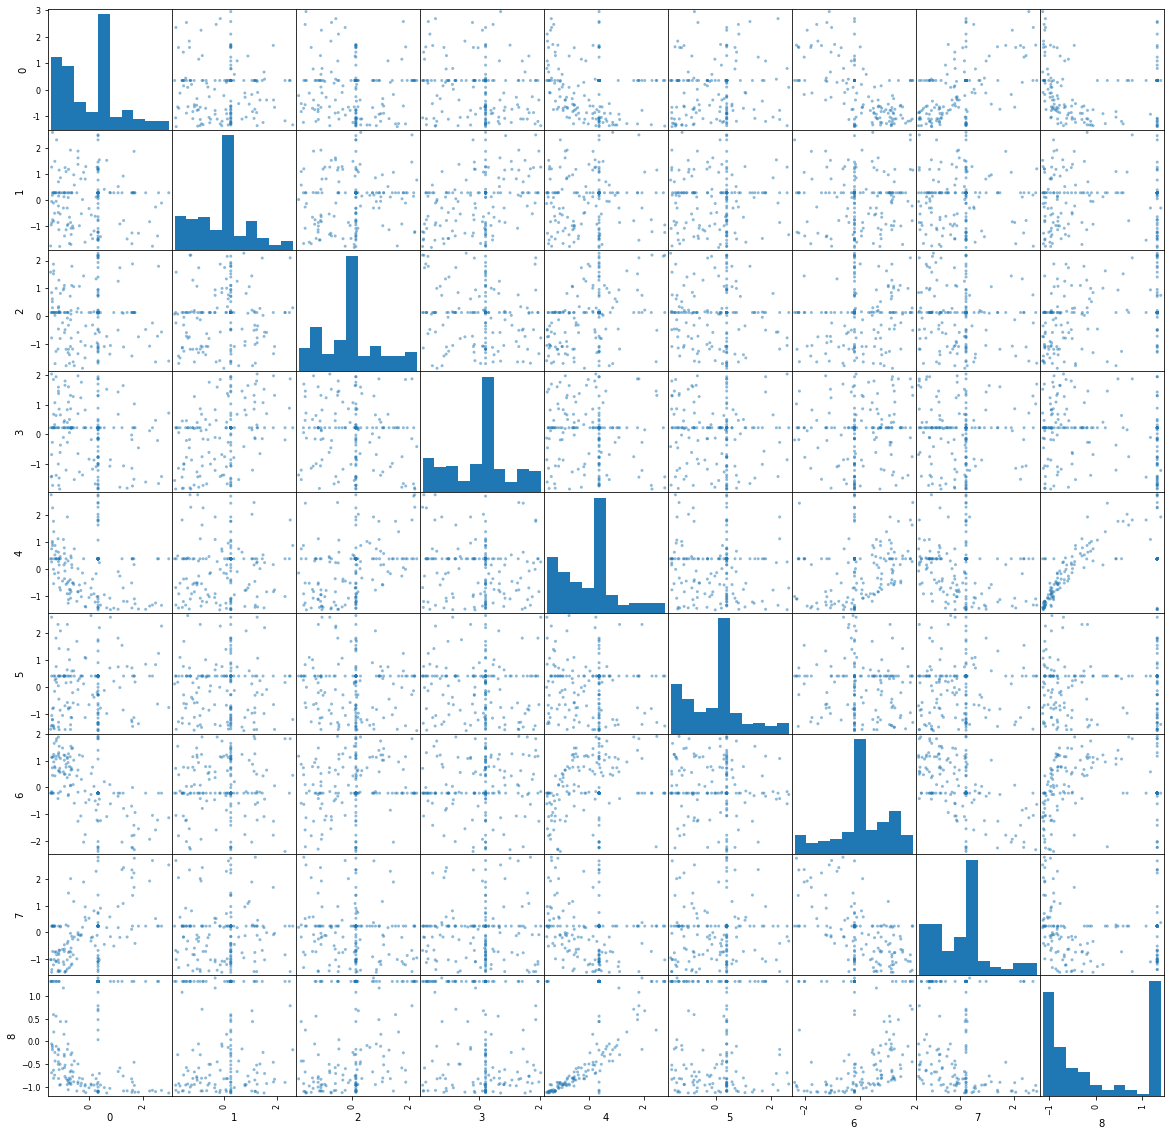

In [13]:
pd.plotting.scatter_matrix(data_4, figsize = [20, 20])

In [14]:
def cluster_country(labels, countries):

    L_cluster = []
    for i in range(len(labels)):
        if labels[i] not in L_cluster:
            L_cluster.append(labels[i])

    L_country = []
    for i in range(len(L_cluster)):
        L_tmp = []
        for j in range(len(labels)):
            if labels[j] == L_cluster[i] :
                L_tmp.append(countries[j])

        L_country.append(L_tmp)

    return L_country

In [15]:
# Fonction permettant d'effectuer le clustering avec la méthode DBSCAN.

def dbscan(X_train, eps, min_samples):

    clustering = cluster.DBSCAN(eps = eps, min_samples = min_samples).fit(X_train)
    labels = clustering.labels_

    return labels

In [16]:
# Fonction permettant d'effectuer un clustering avec la méthode du mélange de gaussienne.

def gmm(X_train, nb_clusters):

    gmm = mixture.GaussianMixture(n_components = nb_clusters).fit(X_train)
    labels = gmm.predict(X_train)

    return labels

In [17]:
def kmeans(X_train, nb_clusters, init, n_init):
    
    kmeans = cluster.KMeans(nb_clusters, init, n_init).fit(X_train)
    kmeans.predict(X_train)
    reskmeans = kmeans.transform(X_train)
    labels = kmeans.labels_

    return labels

In [18]:
countries = data['country'].to_numpy()

# Nombre de clusters pour les méthode du mélange des Gaussiennes et du k-means.
nb_clusters = 10
# Distance pour la méthode DBSCAN.
eps = 2
# Nombre minimum de voisins pour la méthode DBSCAN.
min_samples = 3
# Méthode de calcul du k-means.
init = "k-means++"
# Nombre de clusters à l'initialisation.
n_init = 2


#labels = dbscan(data_4, eps, min_samples)
#labels = gmm(data_4, nb_clusters)
labels = kmeans(data_4, nb_clusters, init, n_init)



L_country = cluster_country(labels, countries)
for country in L_country:
    print(country)
    print("\n\n##################\n\n")

['Afghanistan', 'Austria', 'Bangladesh', 'Belgium', 'Burundi', 'Central African Republic', 'Congo Dem. Rep.', 'Finland', 'Germany', 'Guinea-Bissau', 'Haiti', 'Iceland', 'Ireland', 'Japan', 'Liberia', 'Luxembourg', 'Netherlands', 'Norway', 'Sierra Leone', 'Singapore', 'South Korea', 'Sweden', 'Switzerland', 'Togo', 'Uganda']


##################


['Albania', 'Antigua and Barbuda', 'Bosnia and Herzegovina', 'Bulgaria', 'Colombia', 'El Salvador', 'Estonia', 'Hungary', 'Lebanon', 'Macedonia FYR', 'Maldives', 'Mauritius', 'Montenegro', 'Panama', 'Poland', 'Thailand', 'Tunisia', 'United States', 'Uruguay']


##################


['Algeria', 'Armenia', 'Bahrain', 'China', 'Costa Rica', 'Egypt', 'Georgia', 'Grenada', 'Iran', 'Jamaica', 'Kazakhstan', 'Malaysia', 'Morocco', 'Peru', 'Romania', 'Saudi Arabia', 'Serbia', 'St. Vincent and the Grenadines', 'Turkey', 'Venezuela']


##################


['Angola', 'Belize', 'Bhutan', 'Botswana', 'Cambodia', 'Cape Verde', 'Chad', "Cote d'Ivoire", 'Fiji

parts de variance expliquées par les axes : 
[27.8, 19.72, 14.55, 11.11, 7.95, 5.99, 5.19, 4.34, 3.35]

somme des parts de variance : 
[27.8, 47.52, 62.07, 73.18, 81.13, 87.12, 92.31, 96.65, 100.0]



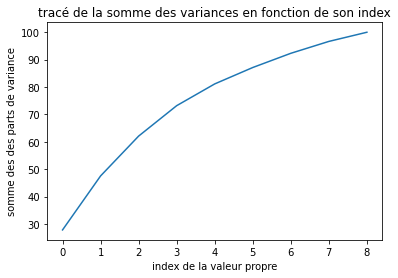


valeurs des valeurs propres : 
[20.44, 17.21, 14.79, 12.92, 10.93, 9.49, 8.83, 8.08, 7.1]



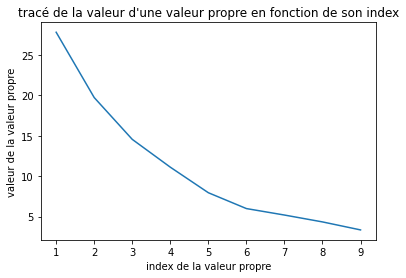

In [19]:
#Fonction permettant d'estimer le nombre d'axes à conserver

def estiACP(data): 

    acp = PCA(svd_solver='full')
    acp.fit(data)

    varexpli = [round(var*100, 2) for var in acp.explained_variance_ratio_]
    print("parts de variance expliquées par les axes : \n"+str(varexpli)+"\n")

    sum_var = [round(sum(varexpli[:i+1]), 2) for i in range(len(varexpli))]
    print("somme des parts de variance : \n"+str(sum_var)+"\n")
    plt.plot([i for i in range(len(varexpli))], sum_var)
    plt.xlabel("index de la valeur propre")
    plt.ylabel("somme des des parts de variance")
    plt.title("tracé de la somme des variances en fonction de son index")
    plt.show()

    val = [round(vp, 2) for vp in acp.singular_values_]
    print("\nvaleurs des valeurs propres : \n"+str(val)+"\n")

    l=[i for i in range(1,len(varexpli)+1)]
    plt.plot(l,varexpli)
    plt.xlabel("index de la valeur propre")
    plt.ylabel("valeur de la valeur propre")
    plt.title("tracé de la valeur d'une valeur propre en fonction de son index")
    plt.show()

estiACP(data_4)

In [28]:
#Prend en entrée les données (9 dimensions) et applique l'ACP en conservant le nombre de composantes principales déclaré, trace ensuite les points correspondant aux données projetées sur ces axes principaux

def ACP(data,nb_composantes_principales): 
    acp2=PCA(n_components=nb_composantes_principales)
    donneesproj=acp2.fit_transform(data)
    return(donneesproj)

data_proj =ACP(data_4 ,4)
#print(data_proj)


[[-3.17179020e-01  1.26001465e+00 -6.77577101e-01  9.48322078e-01]
 [-1.00568714e+00 -1.52297040e+00  1.35240881e+00 -6.17591696e-01]
 [ 3.54561338e-01 -8.08094422e-01  1.53809816e+00  3.27954080e-01]
 [ 1.91593041e+00 -3.37689857e-01 -1.71184321e+00  7.86816414e-01]
 [-1.72763947e+00 -1.79237007e+00 -8.23063233e-01 -1.20283325e+00]
 [-1.55018670e+00 -3.99897920e-01 -1.04250671e-01  5.06538849e-01]
 [ 1.91412969e-01 -1.71812670e+00  2.45094078e+00  1.01647828e-01]
 [-2.01624423e+00  8.59729534e-01  7.04150476e-01 -1.75454915e+00]
 [-2.74160987e-01  7.06748222e-01 -1.45854815e+00  6.88474499e-01]
 [ 2.81055154e-01 -7.22883643e-01 -5.60066931e-01  2.52176023e+00]
 [-2.21244914e+00  7.41430620e-01  2.46000173e-01  4.91352281e-01]
 [-1.31244997e+00 -1.20708555e+00  2.02037260e-01  4.32953746e-01]
 [ 4.76253538e-01  3.34896858e-01 -3.04249122e-01  4.56371489e-01]
 [-1.91168609e+00 -5.97790246e-01  1.52469192e-01  6.13005122e-01]
 [ 2.38720439e-02 -2.00870474e+00 -1.21839579e+00  2.61026311e

In [57]:
data_proj = ACP(data_4, 2)

# Nombre de clusters pour les méthode du mélange des Gaussiennes et du k-means.
nb_clusters = 3
# Distance pour la méthode DBSCAN.
eps = 2
# Nombre minimum de voisins pour la méthode DBSCAN.
min_samples = 3
# Méthode de calcul du k-means.
init = "k-means++"
# Nombre de clusters à l'initialisation.
n_init = 2


#labels = dbscan(data_proj, eps, min_samples)
#labels = gmm(data_4, nb_clusters)
labels = kmeans(data_4, nb_clusters, init, n_init)
labels2=labels


L_country = cluster_country(labels, countries)
for country in L_country:
    print("\nIl y a "+str(len(country))+" pays dans ce cluster \n")
    print(country)
    print("\n\n##################\n\n")


Il y a 54 pays dans ce cluster 

['Afghanistan', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belgium', 'Benin', 'Brunei', 'Burkina Faso', 'Burundi', 'Canada', 'Central African Republic', 'Congo Dem. Rep.', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'Finland', 'France', 'Gambia', 'Germany', 'Greece', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Liberia', 'Luxembourg', 'Malawi', 'Mali', 'Malta', 'Mozambique', 'Netherlands', 'New Zealand', 'Niger', 'Norway', 'Portugal', 'Rwanda', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Timor-Leste', 'Togo', 'Uganda', 'United Kingdom']


##################



Il y a 67 pays dans ce cluster 

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Cro

         child_mortality    exports    health    imports        income  \
cluster                                                                  
0              15.343284  44.044776  6.439254  46.502985  19056.119403   
1              61.328261  34.636500  5.512609  46.149259   4767.391304   
2              47.074074  42.980000  8.392778  48.001852  25316.722222   

         inflation  life_expectation  total_fertility           GDP  
cluster                                                              
0         7.372896         74.797015         2.034478  24639.850746  
1        11.738261         64.110870         3.939130   2154.000000  
2         4.918926         69.479630         3.169111  59475.569921  


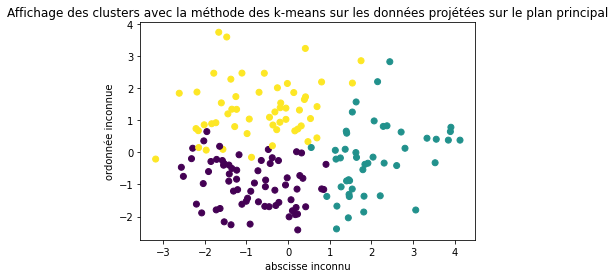

In [61]:
data_1['cluster'] = labels

mean_cluster = data_1.groupby(by = ['cluster']).mean()
print(mean_cluster)

plt.scatter(data_proj[:,0], data_proj[:,1],c=labels2)
plt.title("Affichage des clusters avec la méthode des k-means sur les données projétées sur le plan principal")
plt.xlabel("abscisse inconnu")
plt.ylabel("ordonnée inconnue")
plt.show()

In [108]:
cluster_n = 1
number=10
columns = ['GDP', 'income']
for column in columns : 
    print("\nPour la variable '"+column+"' les pays à aider sont :")
    worst_column = data_1.loc[data_1['cluster'] == cluster_n][column].sort_values()[:number]
    for country in worst_column:
        print(data_1.loc[data_1[column] == country]['country'].to_numpy()[0])



Pour la variable 'GDP' les pays à aider sont :
Madagascar
Eritrea
Gambia
Rwanda
Nepal
Tanzania
Tajikistan
Comoros
Cambodia
Kyrgyz Republic

Pour la variable 'income' les pays à aider sont :
Rwanda
Guinea-Bissau
Comoros
Eritrea
Gambia
Kiribati
Solomon Islands
Chad
Nepal
Tanzania
